# Why do you need SHAP values to interpret non-linear ML models?

In [22]:
houses = {
    'Bedrooms': [3, 3, 3, 3, 3, 3],
    'Bathrooms': [2, 2, 2, 2, 2, 2],
    'Garage': [2, 2, 2, 2, 2, 2],
    'Build Year': [2000, 2000, 2000, 2000, 2000, 2000],
    'Floor Area': [100, 200, 201, 202, 203, 204],
}

In [23]:
import pandas as pd
df_pred = pd.concat({'X': pd.DataFrame(houses)}, axis=1)
df_pred.style

## Load data

In [24]:
path = '../../../data/house_perth/output/ml_simple.csv'
df_base = pd.read_csv(path, index_col=0)
df_base

,Price,Bedrooms,Bathrooms,Garage,Build Year,Floor Area
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,2011.0,109
1 McKenzie Corner,470000,4,2,2.0,2005.0,279
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,2005.0,177
98 Centennial Avenue,441000,4,2,2.0,2004.0,195


## Feature selection

In [25]:
target = 'Price'

y = df_base[target]
X = df_base.drop(columns=target)

## Linear models

### Modelling

To optimize the weights of the mathematical equation.

In [26]:
from sklearn.linear_model import LinearRegression

model_lineal = LinearRegression()
model_lineal.fit(X, y)

LinearRegression()

### Evaluation

To compare the predictions with the real values.

In [27]:
model_lineal.score(X, y)

0.5881533749382085

### Explainaibility

To understand how each feature contributes to the prediction.

In [28]:
y_pred = model_lineal.predict(df_pred['X'])
df_pred['y_pred_lineal', 'Price'] = y_pred
df_pred['y_pred_lineal', 'Price_DIF'] = df_pred['y_pred_lineal', 'Price'].diff()
df_pred.style

In [29]:
model_lineal.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Bedrooms', 'Bathrooms', 'Garage', 'Build Year', 'Floor Area'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([20407.52444216, -5446.13921643,  1952.49704666, -2468.27502394,
         1080.61667876]),
 'rank_': 5,
 'singular_': array([530.86671669,  37.87460383,   8.72349157,   5.89859143,
          1.46656318]),
 'intercept_': 5081430.233404346}

## Non-linear models

### Modelling

To optimize the weights of the mathematical equation.

In [30]:
from sklearn.tree import DecisionTreeRegressor

model_lineal_no = DecisionTreeRegressor()
model_lineal_no.fit(X, y)

DecisionTreeRegressor()

### Evaluation

To compare the predictions with the real values.

In [31]:
model_lineal_no.score(X, y)

0.9746449876358452

### Explainaibility

To understand how each feature contributes to the prediction.

In [32]:
y_pred = model_lineal_no.predict(df_pred['X'])
df_pred['y_pred_lineal_no', 'Price'] = y_pred
df_pred['y_pred_lineal_no', 'Price_DIF'] = df_pred['y_pred_lineal_no', 'Price'].diff()
df_pred.style

In [33]:
model_lineal_no.__dict__

{'criterion': 'squared_error',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Bedrooms', 'Bathrooms', 'Garage', 'Build Year', 'Floor Area'],
       dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x12c7c91b0>}

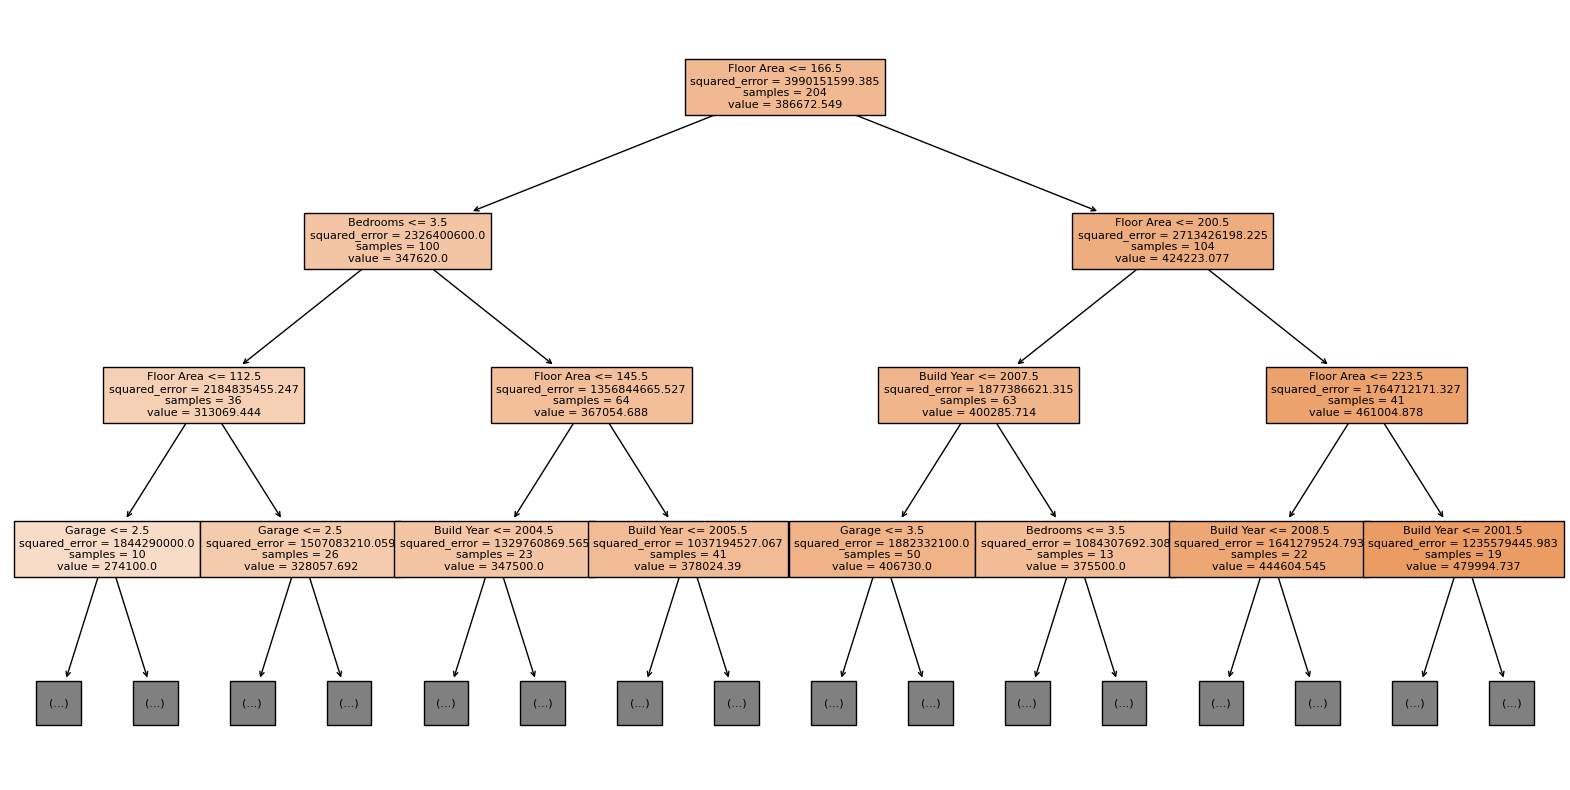

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model_lineal_no, max_depth=3, fontsize=8, feature_names=X.columns.tolist(), filled=True);

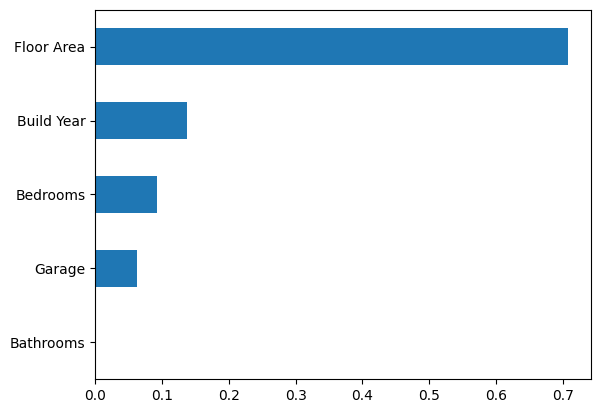

In [35]:
fi = model_lineal_no.feature_importances_
fn = model_lineal_no.feature_names_in_

pd.Series(fi, index=fn).sort_values(ascending=True).plot.barh();

## Summary

### Problem

| Non-linear models | Linear models |
| --- | --- |
| More complex | Less complex |
| More accurate (90%) | Less accurate (60%) |

### Solution

https://www.youtube.com/watch?v=ngOBhhINWb8

## SHAP to explain non-linear models

### Explainer

In [36]:
import shap
explainer = shap.TreeExplainer(model_lineal_no)

### SHAP values

In [37]:
df_pred['X'].style

,Bedrooms,Bathrooms,Garage,Build Year,Floor Area
0,3,2,2,2000,100
1,3,2,2,2000,200
2,3,2,2,2000,201
3,3,2,2,2000,202
4,3,2,2,2000,203
5,3,2,2,2000,204


In [38]:
shap_values = explainer.shap_values(df_pred['X'])
shap_values

array([[-45973.77586184,    -73.85620915,   5528.99822227,
         31375.36134693, -67529.27651781],
       [-14091.59619771,  -1204.8085901 ,  -1131.8747936 ,
          3794.73677826,  -1039.00621646],
       [-10907.49566861,    -73.85620915,  -3957.51692925,
         -2969.52007599,  56235.83986339],
       [-10907.49566861,    -73.85620915,  -3957.51692925,
         -2969.52007599,  56235.83986339],
       [-10907.49566861,    -73.85620915,  -4055.39571712,
         -1305.58068206,  54669.77925733],
       [-10907.49566861,    -73.85620915,  -4055.39571712,
         -1305.58068206,  54669.77925733]])

### Plots

#### Decision

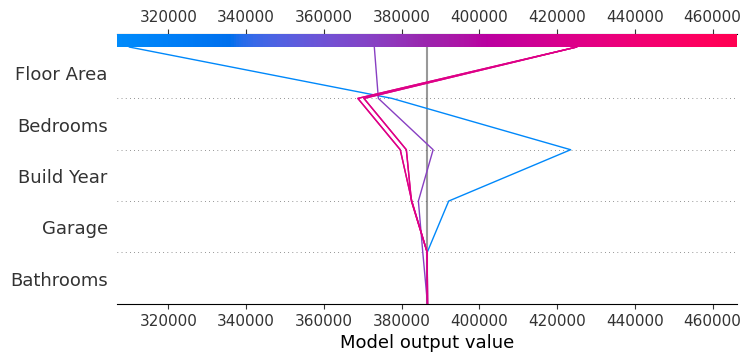

In [39]:
shap.decision_plot(explainer.expected_value, shap_values, df_pred['X'])

#### Force: Individual

In [40]:
shap.initjs()

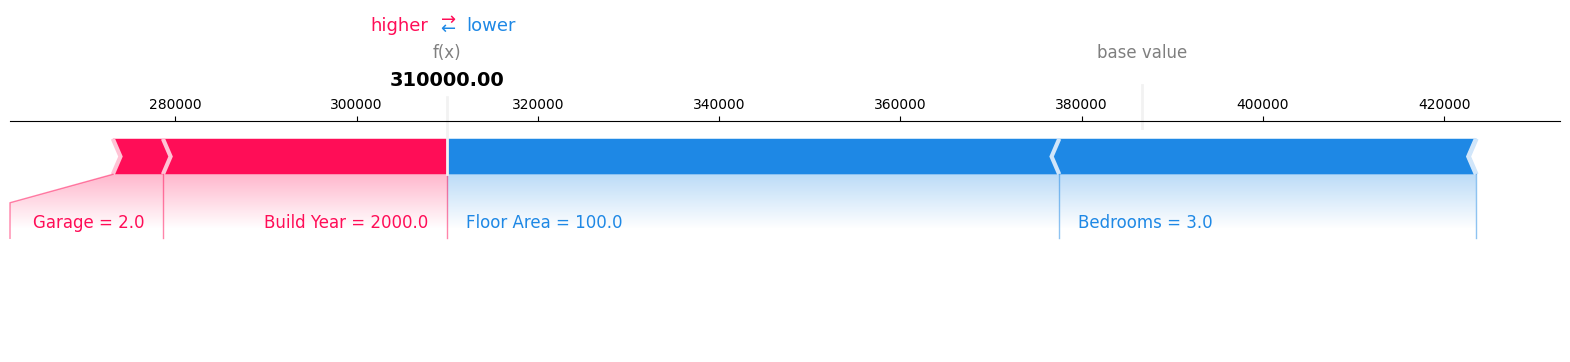

In [41]:
row = 0
shap.force_plot(explainer.expected_value, shap_values[row], df_pred['X'].iloc[row], matplotlib=True)

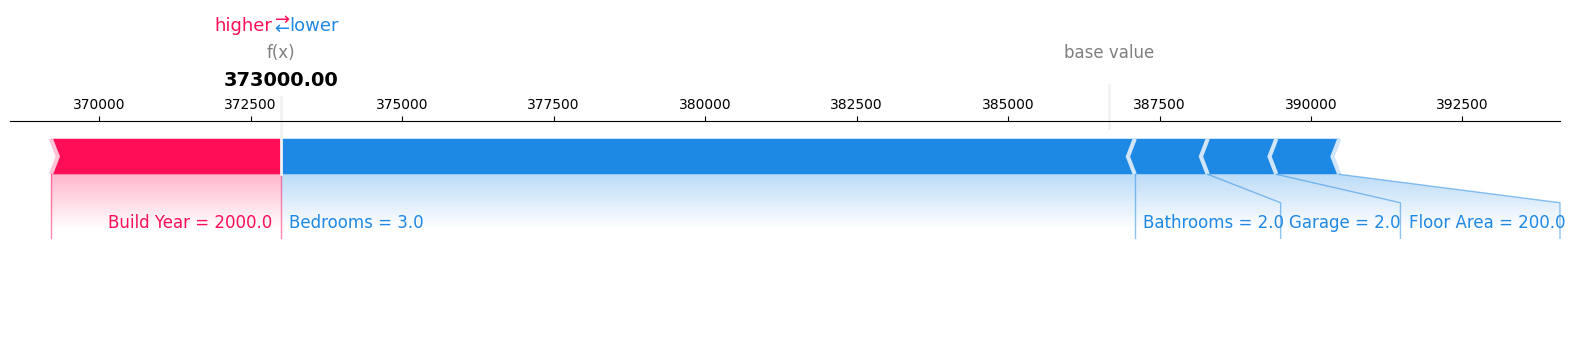

In [42]:
row = 1
shap.force_plot(explainer.expected_value, shap_values[row], df_pred['X'].iloc[row], matplotlib=True)

### Full data

In [43]:
shap_values = explainer.shap_values(X)
shap_values

array([[-2.84907549e+04, -7.24332789e+01,  2.76533010e+03,
        -1.77003552e+04, -7.31743357e+04],
       [ 3.67584029e+03, -1.96098856e+02,  1.27291426e+03,
        -9.97860234e+03,  8.85533976e+04],
       [ 4.08871171e+03, -1.20480859e+03,  2.42381321e+03,
         3.14627171e+04,  2.15570176e+04],
       ...,
       [ 7.63640828e+03, -7.24332789e+01, -5.57788671e+02,
         1.70734054e+04, -4.75214075e+03],
       [ 5.26381427e+03, -1.96098856e+02, -1.21999776e+03,
        -4.62355975e+03, -3.58967069e+04],
       [ 3.85061648e+03, -7.38562092e+01,  2.95879998e+03,
         1.86004816e+04,  2.89914091e+04]])

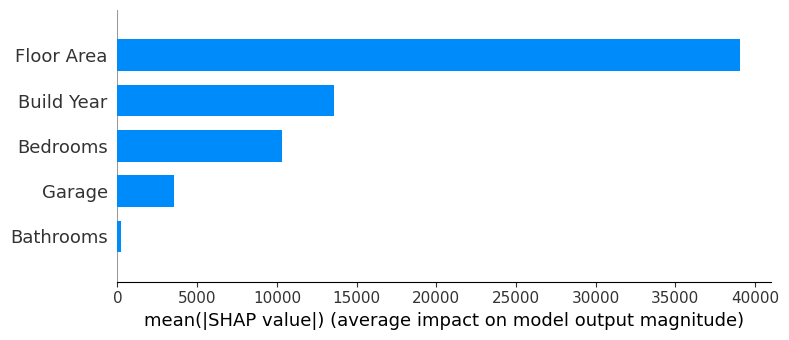

In [44]:
shap.summary_plot(shap_values, X, plot_type='bar')

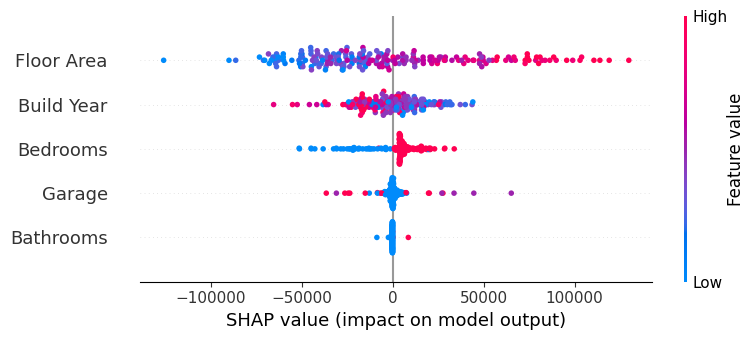

In [45]:
shap.summary_plot(shap_values, X)

In [46]:
shap.plots.force(explainer.expected_value, shap_values, X)

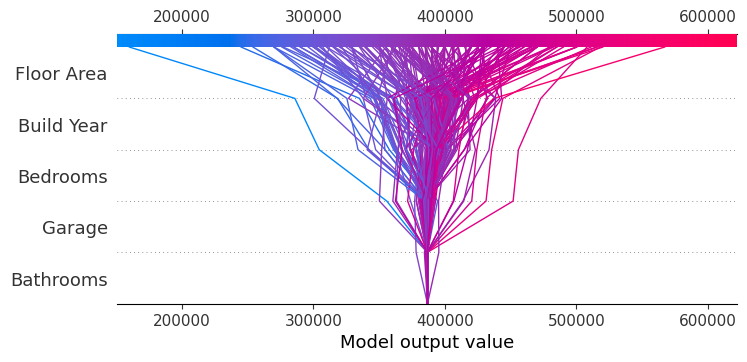

In [47]:
shap.decision_plot(explainer.expected_value, shap_values, X)

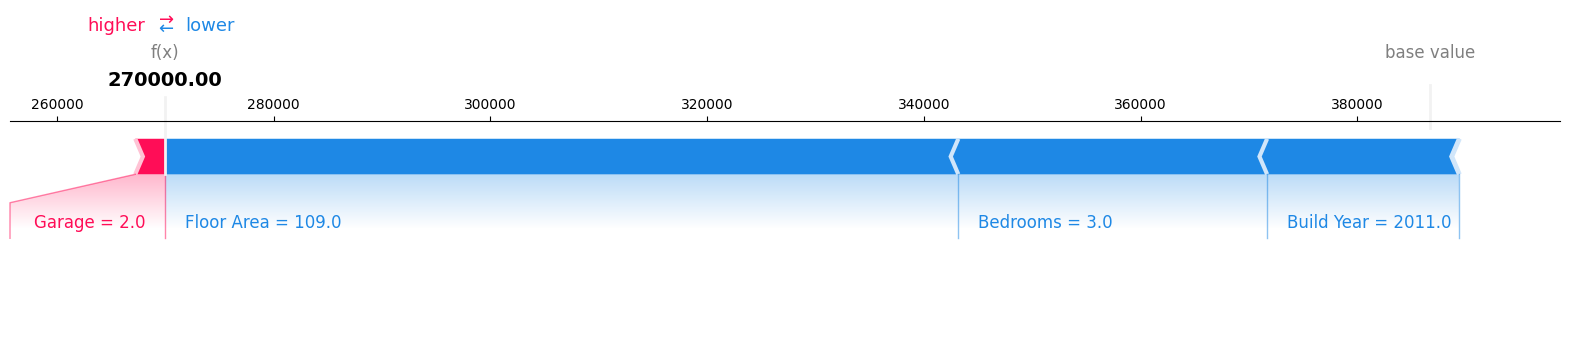

In [48]:
row = 0
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row], matplotlib=True)

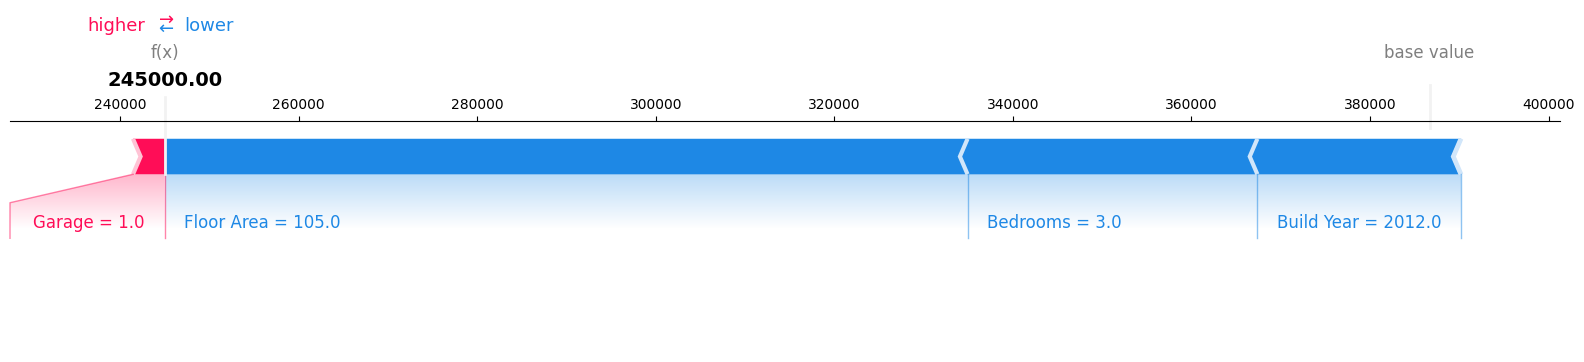

In [49]:
row = 4
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row], matplotlib=True)

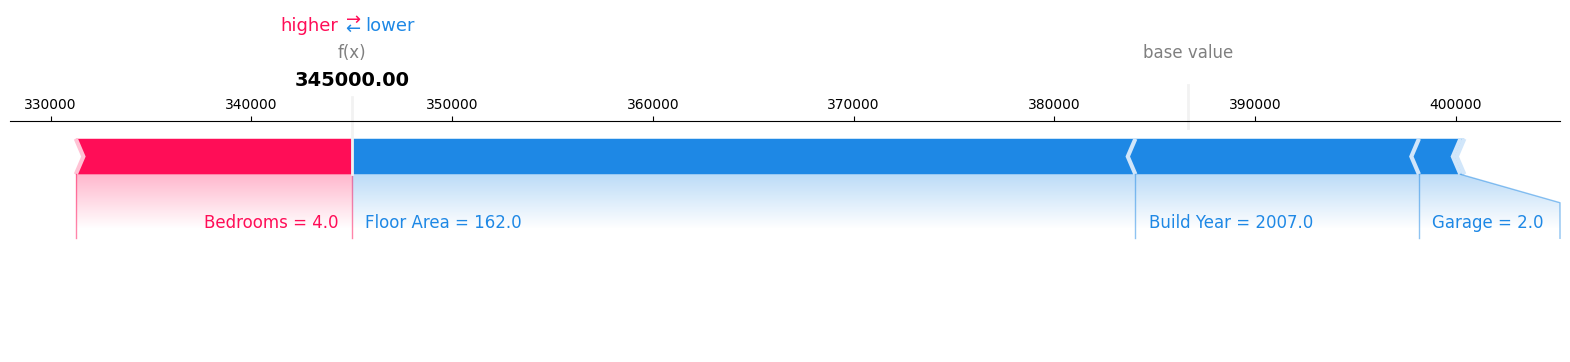

In [50]:
row = 14
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row], matplotlib=True)

## References

### Shapley values from game theory

https://www.youtube.com/watch?v=w9O0fkfMkx0

### Permutation importance

- https://www.youtube.com/watch?v=-taOhqkiuIo
- https://www.kaggle.com/code/dansbecker/permutation-importance